In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | alpena
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | conde
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | beloha
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | xai-xai
Processing Record 15 of Set 1 | pergine valsugana
Processing Record 16 of Set 1 | kedougou
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | savinka
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | san vicente
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | chokurdakh


Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | moroni
Processing Record 41 of Set 4 | bonavista
Processing Record 42 of Set 4 | takapau
Processing Record 43 of Set 4 | khandyga
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | paragould
Processing Record 47 of Set 4 | awjilah
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | hovd
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | kachug
Processing Record 3 of Set 5 | sahuaripa
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | adrar
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | dharchula
Processing Record 11 of Set 5 | lazarev
Processing Record 12 of Set 5 | lac du bonn

Processing Record 31 of Set 8 | anadyr
Processing Record 32 of Set 8 | mount isa
Processing Record 33 of Set 8 | kashin
Processing Record 34 of Set 8 | jeremie
Processing Record 35 of Set 8 | otaru
Processing Record 36 of Set 8 | narsaq
Processing Record 37 of Set 8 | tiarei
Processing Record 38 of Set 8 | prainha
Processing Record 39 of Set 8 | viligili
City not found. Skipping...
Processing Record 40 of Set 8 | meihekou
Processing Record 41 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 8 | sistranda
Processing Record 43 of Set 8 | ituni
City not found. Skipping...
Processing Record 44 of Set 8 | concepcion del uruguay
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | aybak
City not found. Skipping...
Processing Record 47 of Set 8 | katsuura
Processing Record 48 of Set 8 | tambura
Processing Record 49 of Set 8 | porto novo
Processing Record 50 of Set 8 | drayton valley
Processing Record 1 of Set 9 | high level
Processing Recor

Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | ukiah
Processing Record 23 of Set 12 | ijaki
City not found. Skipping...
Processing Record 24 of Set 12 | hasaki
Processing Record 25 of Set 12 | mackenzie
Processing Record 26 of Set 12 | ouesso
Processing Record 27 of Set 12 | asau
Processing Record 28 of Set 12 | chicama
Processing Record 29 of Set 12 | qrendi
Processing Record 30 of Set 12 | placido de castro
Processing Record 31 of Set 12 | tshane
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | yeovil
Processing Record 34 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 12 | surt
Processing Record 36 of Set 12 | zyryanka
Processing Record 37 of Set 12 | dumas
Processing Record 38 of Set 12 | banda aceh
Processing Record 39 of Set 12 | huarmey
Processing Record 40 of Set 12 | tautira
Processing Record 41 of Set 12 | bonthe
Processing Record 42 of Set 12 | auki
Processing Record 43 of Set 12 | sinnamary
Processing 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,66.34,80,20,13.80,ZA,2022-04-04 16:48:29
1,East London,-33.0153,27.9116,70.74,83,20,5.75,ZA,2022-04-04 16:50:59
2,Alpena,45.0617,-83.4327,38.10,91,100,8.05,US,2022-04-04 16:49:27
3,Kapaa,22.0752,-159.3190,73.11,79,75,18.41,US,2022-04-04 16:51:00
4,Bluff,-46.6000,168.3333,53.85,84,100,8.43,NZ,2022-04-04 16:51:01
5,Ushuaia,-54.8000,-68.3000,42.42,70,40,21.85,AR,2022-04-04 16:49:36
6,Rikitea,-23.1203,-134.9692,77.40,63,14,12.59,PF,2022-04-04 16:51:01
7,Bredasdorp,-34.5322,20.0403,65.17,71,3,13.24,ZA,2022-04-04 16:51:01
8,Conde,-7.2597,-34.9075,85.46,62,40,16.11,BR,2022-04-04 16:50:10
9,Albany,42.6001,-73.9662,49.93,51,77,5.99,US,2022-04-04 16:48:35


In [10]:
# Change the order of the headings
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-04-04 16:48:29,-33.9258,18.4232,66.34,80,20,13.80
1,East London,ZA,2022-04-04 16:50:59,-33.0153,27.9116,70.74,83,20,5.75
2,Alpena,US,2022-04-04 16:49:27,45.0617,-83.4327,38.10,91,100,8.05
3,Kapaa,US,2022-04-04 16:51:00,22.0752,-159.3190,73.11,79,75,18.41
4,Bluff,NZ,2022-04-04 16:51:01,-46.6000,168.3333,53.85,84,100,8.43
5,Ushuaia,AR,2022-04-04 16:49:36,-54.8000,-68.3000,42.42,70,40,21.85
6,Rikitea,PF,2022-04-04 16:51:01,-23.1203,-134.9692,77.40,63,14,12.59
7,Bredasdorp,ZA,2022-04-04 16:51:01,-34.5322,20.0403,65.17,71,3,13.24
8,Conde,BR,2022-04-04 16:50:10,-7.2597,-34.9075,85.46,62,40,16.11
9,Albany,US,2022-04-04 16:48:35,42.6001,-73.9662,49.93,51,77,5.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

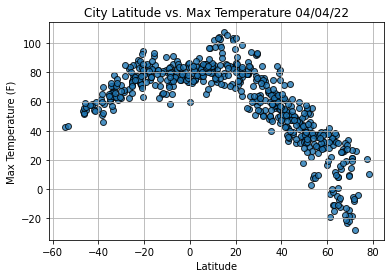

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

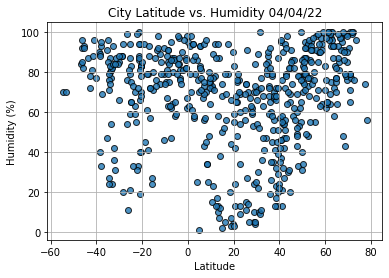

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

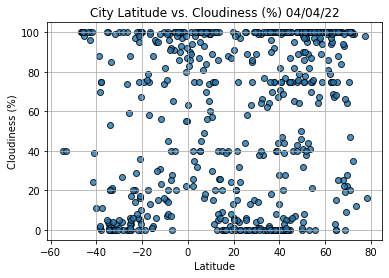

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()